0.46774193548387094
0.43859649122807015
0.7868852459016393


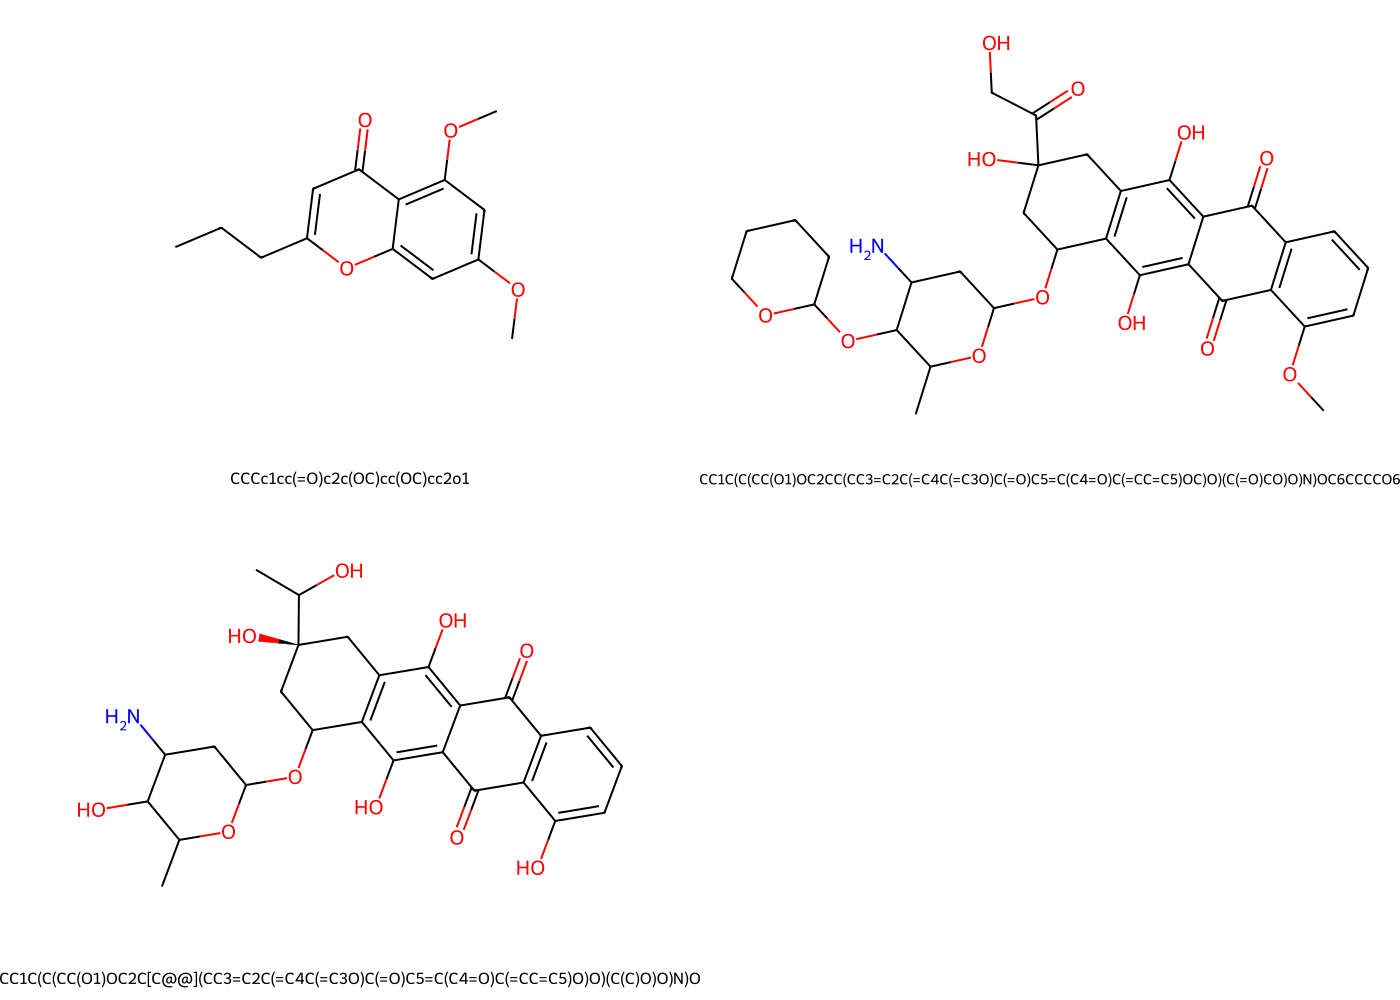

In [8]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, AllChem, MACCSkeys
import matplotlib as mpl
import numpy as np
"""
smi = "C[C@H]([C@@H](C(=O)O)NC(=O)[C@H](CCC(=O)O)NC(=O)CNC(=O)[C@H](CCCCN)NC(=O)[C@@H]1CCCN1C(=O)CNC(=O)[C@H](CCC(=O)N)NC(=O)[C@H](CCC(=O)O)NC(=O)CNC(=O)[C@H](CC[C@H](CN)O[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)O)O)NC(=O)[C@H](CC3=CSC=N3)NC(=O)CNC(=O)[C@H](C)NC(=O)[C@H](CCC(=O)N)NC(=O)CN)O"
#colors = [mpl.colormaps['YlOrBr'](0.2 * i)[:3] for i in range(1, 5)]
mol = Chem.MolFromSmiles(smi)
img = Draw.MolsToGridImage([mol], legends=[smi], molsPerRow=1, subImgSize=(1200, 500))
display(img)
"""
#CC(=O)N[C@H](CCC[C@@H]1C(=O)N[C@H]C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N1)CCCN(C(=O)C)O)CCCN(C(=[OH+])C)C)O)O.[Fe]

smis = ["CCCc1cc(=O)c2c(OC)cc(OC)cc2o1",
"CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C(=O)CO)O)N)OC6CCCCO6",
"CC1C(C(CC(O1)OC2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)O)O)(C(C)O)O)N)O",]

mols = [Chem.MolFromSmiles(smi) for smi in smis]
print(DataStructs.FingerprintSimilarity(MACCSkeys.GenMACCSKeys(mols[0]), MACCSkeys.GenMACCSKeys(mols[1]), metric=DataStructs.TanimotoSimilarity))
print(DataStructs.FingerprintSimilarity(MACCSkeys.GenMACCSKeys(mols[0]), MACCSkeys.GenMACCSKeys(mols[2]), metric=DataStructs.TanimotoSimilarity))
print(DataStructs.FingerprintSimilarity(MACCSkeys.GenMACCSKeys(mols[1]), MACCSkeys.GenMACCSKeys(mols[2]), metric=DataStructs.TanimotoSimilarity))
#print(DataStructs.TanimotoSimilarity(AllChem.GetMorganFingerprint(mols[1], 2), AllChem.GetMorganFingerprint(mols[3], 2)))

img = Draw.MolsToGridImage(mols, legends=smis, molsPerRow=2, subImgSize=(700, 500))
display(img)

In [14]:
from rdkit import DataStructs
from rdkit.Chem import AllChem, MACCSkeys

with open("../../assets/text2smi/molt5-smi.txt", "r") as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            continue
        line = line.rstrip("\n").split("\t")
        if i % 10 == 0:
            gt = line[1]
            pred = line[2]
            try:
                gt_mol = Chem.MolFromSmiles(gt)
                pred_mol = Chem.MolFromSmiles(pred)
                print(gt, pred, DataStructs.TanimotoSimilarity(AllChem.GetMorganFingerprint(gt_mol, 2), AllChem.GetMorganFingerprint(pred_mol, 2)))
            except:
                print("Invalid SMILES")

CC1=C2C=C(C=C(C2=CC=C1)C(=O)O)[O-] CC1=C2C=CC(=C(C2=CC=C1)C(=O)O)[O-] 0.5769230769230769
C(CCC[C@H](CC(=O)O)O)CCCO C(CCCCCC(=O)O)CCCCO 0.54
CSC[C@@H]1[C@@H]([C@H]([C@H](O1)O[C@@H]2[C@H](O[C@@H]([C@H]([C@H]2O)O)OC[C@@H]3[C@H]([C@@H]([C@@H](O3)O[C@H]4[C@@H]([C@H](O[C@@H]4OC[C@@H]5[C@H]([C@@H]([C@H](O5)OC[C@@H]6[C@H]([C@@H](C(O6)O)O)O)O)O[C@@H]7[C@H]([C@@H]([C@H](O7)CO)O)O[C@H]8[C@H]([C@@H]([C@H](O8)CO)O)O)CO)O)O)O)CO)O)O CSC[C@@H]1[C@@H]([C@H]([C@H](O1)O[C@@H]2[C@H](O[C@@H]([C@H]([C@H]2O)O)OC[C@@H]3[C@H]([C@@H]([C@@H](O3)O[C@H]4[C@@H]([C@H](O[C@@H]4O[C@@H]5[C@H](O[C@@H]([C@H]5O)OC[C@@H]6[C@H]([C@@H](C(O6)O)O)O)CO[C@@H]7[C@H]([C@@H]([C@H](O7)CO)O)O[C@H]8[C@H]([C@@H]([C@H](O8)CO)O)O)CO)O)O)O)CO)O)O 1.0
CC1=CC(=O)C(=C(C1=O)O)OC CC1=C(C(=O)C(=C(C1=O)OC)O)C/C=C(C)/CCC=C(C)C 0.3283582089552239
C(CN)[C@H](C[C@@H](C(=O)O)N)O C(C[C@@H](C(=O)O)N)O 0.45454545454545453
CC(C)CCCCCCCCCCCC(=O)[O-] CC(C)CCCCCCCCCCCCCC(=O)[O-] 0.8867924528301887
C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@@H]2[C@H](O[C@@H](

[09:23:01] SMILES Parse Error: unclosed ring for input: 'C[C@H]1[C@@H]([C@H](C[C@@H](O1)O[C@@H]2[C@H](C3=CC=CC=C3)C(=O)OC)C4=CC=C(C=C4)Cl)C'
[09:23:01] SMILES Parse Error: extra close parentheses while parsing: C[C@@H]([C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC[C@@H]4[C@@]3(CCC(=O)C4)C)O)C)O)O
[09:23:01] SMILES Parse Error: Failed parsing SMILES 'C[C@@H]([C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC[C@@H]4[C@@]3(CCC(=O)C4)C)O)C)O)O' for input: 'C[C@@H]([C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC[C@@H]4[C@@]3(CCC(=O)C4)C)O)C)O)O'
[09:23:01] SMILES Parse Error: extra open parentheses for input: 'C1C[C@H](N(C1)C(=O)[C@@H]2CCCN2C(=O)[C@H](CC3=CC=C(C=C3)O)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CCC(=O)N[C@@H](CC4=CC=CC=C4)C(=O)N'
[09:23:01] SMILES Parse Error: extra open parentheses for input: 'C1[C@H]([C@@H]([C@H]([C@@H](O1)O[C@@H]2[C@H]([C@@H]([C@H](O[C@H]2O[C@@H]3[C@H]([C@@H]([C@H](O[C@H]3OC4=C(C(=CC(=C4)O)O)O)O)O)O)O'
[09:23:01] SMILES Parse Error: extra open parentheses for 

In [4]:
import numpy as np

a={'mrr_d2t': 0.12001504940938174, 'mrr_t2d': 0.11567312345331186, 'rec@1_d2t': 0.06027890238416554, 'rec@1_t2d': 0.06027890238416554, 'rec@5_d2t': 0.17273954116059378, 'rec@5_t2d': 0.15969410706252812, 'rec@10_d2t': 0.2321187584345479, 'rec@10_t2d': 0.23346828609986506}
b={'mrr_d2t': 0.13939502681598706, 'mrr_t2d': 0.13457923263237084, 'rec@1_d2t': 0.08232118758434548, 'rec@1_t2d': 0.07917228969860549, 'rec@5_d2t': 0.1871345029239766, 'rec@5_t2d': 0.18083670715249664, 'rec@10_d2t': 0.24336482231219073, 'rec@10_t2d': 0.23976608187134502}
c={'mrr_d2t': 0.12042050505402281, 'mrr_t2d': 0.11437770782413341, 'rec@1_d2t': 0.0625281151596941, 'rec@1_t2d': 0.05847953216374269, 'rec@5_d2t': 0.17049032838506523, 'rec@5_t2d': 0.1623931623931624, 'rec@10_d2t': 0.23931623931623933, 'rec@10_t2d': 0.23391812865497075}
d={'mrr_d2t': 0.13753298235736336, 'mrr_t2d': 0.12714797513363585, 'rec@1_d2t': 0.08097165991902834, 'rec@1_t2d': 0.07062528115159694, 'rec@5_d2t': 0.18353576248313092, 'rec@5_t2d': 0.17588843904633378, 'rec@10_d2t': 0.24066576698155645, 'rec@10_t2d': 0.23256860098965362}
all = {}
for key in a:
    cur = [a[key], b[key], c[key], d[key]]
    print(key, ":", np.mean(cur), "±", np.sqrt(np.var(cur)))

mrr_d2t : 0.12934089090918874 ± 0.009147958988378144
mrr_t2d : 0.12294450976086299 ± 0.008356121284628475
rec@1_d2t : 0.07152496626180836 ± 0.010163853826086375
rec@1_t2d : 0.06713900134952766 ± 0.008351669589736087
rec@5_d2t : 0.17847503373819162 ± 0.007022264177125131
rec@5_t2d : 0.16970310391363022 ± 0.008885813901697256
rec@10_d2t : 0.23886639676113358 ± 0.0041595236187375
rec@10_t2d : 0.2349302744039586 ± 0.002833918841285228


tensor([[ 0,  1,  1,  2,  2,  3,  2,  4,  4,  5,  4,  6,  6,  7,  7,  8,  8,  9,
          9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18,
         18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 23, 25, 25, 26, 26, 27,
         27, 28, 28, 29, 22, 30, 17, 31, 16, 32, 32, 33, 33, 34, 33, 35, 35, 36,
         15, 37, 10, 38,  9, 39, 39, 40, 40, 41, 40, 42, 15,  7, 14, 10, 18, 13,
         21, 17, 24, 20, 29, 25],
        [ 1,  0,  2,  1,  3,  2,  4,  2,  5,  4,  6,  4,  7,  6,  8,  7,  9,  8,
         10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 15, 17, 16, 18, 17,
         19, 18, 20, 19, 21, 20, 22, 21, 23, 22, 24, 23, 25, 23, 26, 25, 27, 26,
         28, 27, 29, 28, 30, 22, 31, 17, 32, 16, 33, 32, 34, 33, 35, 33, 36, 35,
         37, 15, 38, 10, 39,  9, 40, 39, 41, 40, 42, 40,  7, 15, 10, 14, 13, 18,
         17, 21, 20, 24, 25, 29]])
{'input_ids': [102, 256, 434, 106, 1447, 188, 130, 12483, 1503, 10721, 422, 130, 821, 18242, 268, 137, 106, 2529, 13681, 

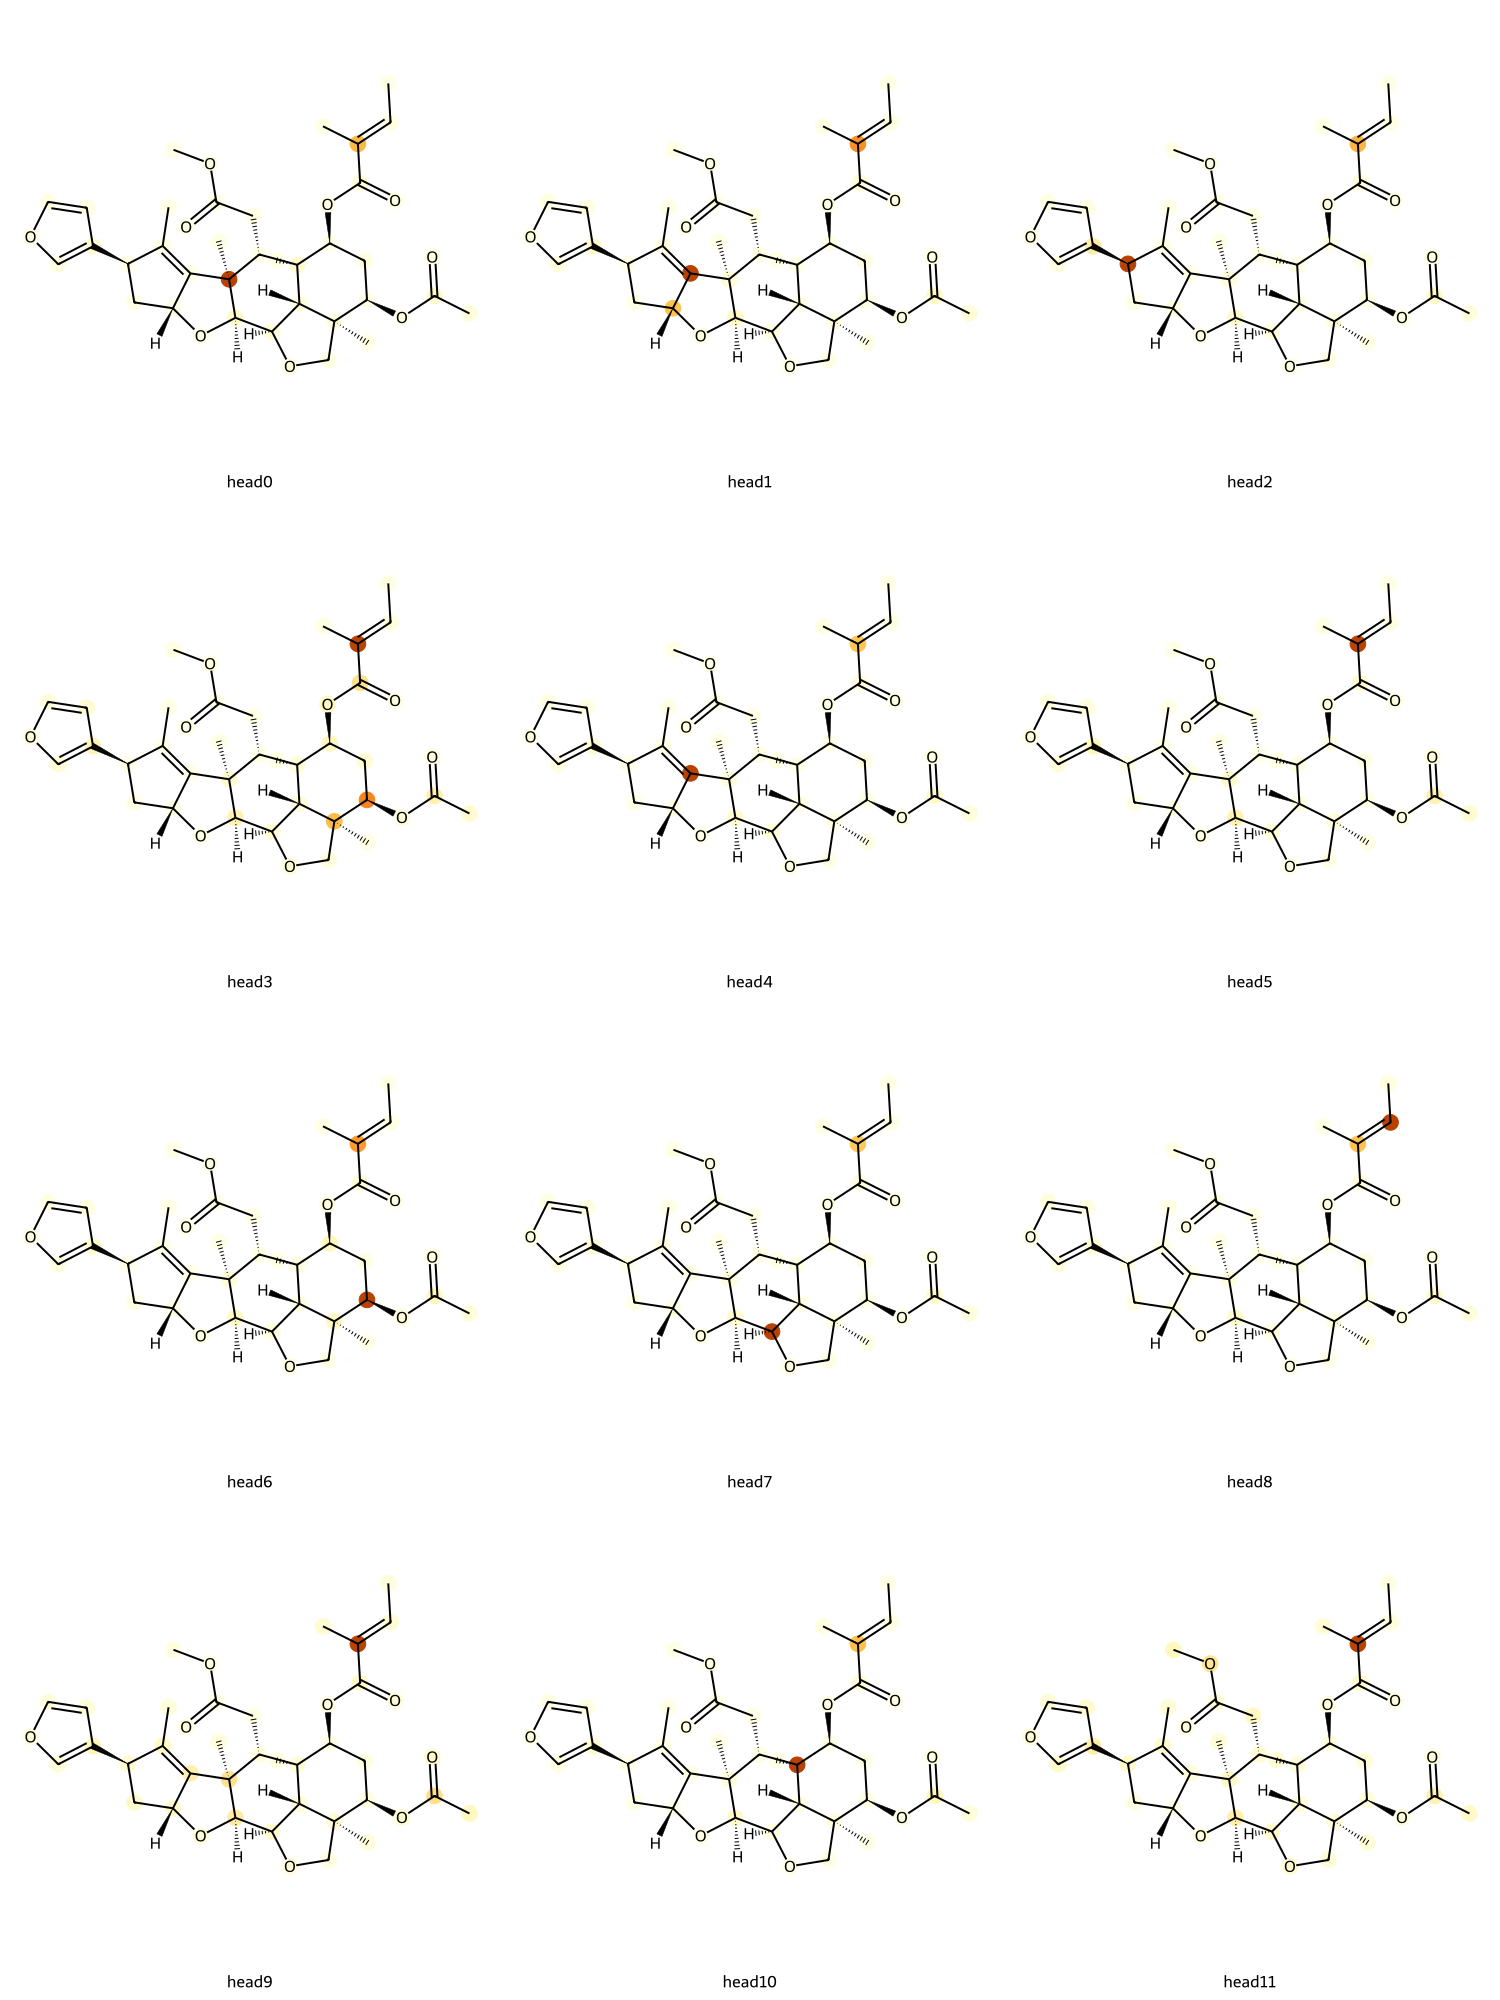

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.useBWAtomPalette()

import os
import sys
sys.path.append("/root/Open_DAIR_BioMed/open_biomed/")

import json
import torch
import torch.nn.functional as F
import matplotlib as mpl

from transformers import BertTokenizerFast
from torch_geometric.data import Batch

from models.drug_encoder.molalbef import MolALBEF
from feat.drug_featurizer import DrugGraphFeaturizer
from feat.text_featurizer import TextTransformerTokFeaturizer

#smi = "CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)C(F)(F)F"
smi = "C/C=C(\C)/C(=O)O[C@H]1C[C@H]([C@]2(CO[C@@H]3[C@@H]2[C@]1([C@H]([C@]4([C@@H]3O[C@H]5C4=C([C@@H](C5)C6=COC=C6)C)C)CC(=O)OC)C)C)OC(=O)C"
#text = "it is a fatty acid derivative that is arachidonic acid in which the OH part of the carboxy group has been replaced by a trifluoromethyl group It has a role as an EC 3.1.1.4 (phospholipase A2) inhibitor. It is an organofluorine compound, a ketone, an olefinic compound and a fatty acid derivative. It derives from an arachidonic acid. "
#text = "it derives from a arachidonic acid"
#text = "it contains a trifluoromethyl group"
#text = "it has a role as an EC 3.1.1.4 (phospholipase A2) inhibitor."
#text = "It is a ketone"
#text = "it is an olefinic compound"
#text = "it derives from a 2-aminopropan-1-ol"
text = "it has a role as an insect growth regulator, an antifeedant and a plant metabolite"
#text = "it is structurally related to lidocaine"
mol = DrugGraphFeaturizer({
    "name": "BaseGNN"
})(smi)
print(mol.edge_index)
mol = Batch.from_data_list([mol])
text_input = TextTransformerTokFeaturizer({
    "name": "TransformerTokenizer",
    "transformer_type": "bert",
    "max_length": 128,
    "model_name_or_path": "/root/Open_DAIR_BioMed/ckpts/text_ckpts/scibert_scivocab_uncased"
})(text)
tokenizer = BertTokenizerFast.from_pretrained("/root/Open_DAIR_BioMed/ckpts/text_ckpts/scibert_scivocab_uncased")
tokens = tokenizer.convert_ids_to_tokens(text_input["input_ids"])
print(text_input, tokens)
for key in text_input:
    text_input[key] = torch.tensor([text_input[key]])

model = MolALBEF({
    "gin_hidden_dim": 300,
    "gin_num_layers": 5,
    "drop_ratio": 0.0,
    "bert_config_path": "/root/Open_DAIR_BioMed/open_biomed/configs/mtr/kvplm_bert_config.json",
    "max_n_nodes": 128,
    "projection_dim": 256,
    "kge": {
        "n_ents": 49111,
        "n_rels": 16,
        "norm": 1,
        "hidden_size": 256,
        "margin": 1.0
    }
})
print(sum(p.numel() for p in model.kg_encoder.parameters()))
print(sum(p.numel() for p in model.graph_encoder.parameters()))
print(sum(p.numel() for p in model.text_encoder.parameters()))
#state_dict = torch.load("/root/Open_DAIR_BioMed/ckpts/finetune_ckpts/molalbef-paragraph-finetune.pth")["model_state_dict"]
state_dict = torch.load("/root/Open_DAIR_BioMed/ckpts/fusion_ckpts/molalbef-ke/checkpoint_399.pth")["model"]
model.load_state_dict(state_dict)
result = model(mol, text_input, None, False, True)
attn = result["cross_attentions"][0].squeeze(0)
print(attn.shape)

mol = Chem.MolFromSmiles(smi)
#sents = [list(range(1, 12)), list(range(12, 30)), list(range(30, 52)), list(range(52, 64)), list(range(64, 67)), list(range(67, 72)), list(range(73, 77)), list(range(78, 84))]
sents = [list(range(len(tokens)))]
highlight_colors = []
attn = attn[:, 0]
#print(cur_attn)

for i in range(attn.shape[0]):
    cur_attn = attn[i] + attn[5]
    print(cur_attn)
    mn, mx = cur_attn.min(), cur_attn.max()
    cur_attn = (cur_attn - mn) / (mx - mn)
    #cur_attn = torch.mean(cur_attn, dim=0)
    cur_attn = cur_attn.detach().numpy()
    print(cur_attn)
    highlight_colors.append([mpl.colormaps['YlOrBr'](cur_attn[i] * 0.8)[:3] for i in range(mol.GetNumAtoms())])
img = Draw.MolsToGridImage(
    [mol for i in range(12)], 
    legends=['head' + str(i) for i in range(12)], 
    molsPerRow=3, 
    subImgSize=(500, 500), 
    highlightAtomLists=[list(range(mol.GetNumAtoms())) for i in range(12)], 
    highlightAtomColors=[dict(zip(list(range(mol.GetNumAtoms())), highlight_colors[i])) for i in range(12)],
    highlightBondLists=[[] for i in range(12)]
)
display(img)

5898 C1=CC(=C(C(=C1)Cl)CC(=O)N=C(N)N)Cl
6521 CCOC1=NC2=CC=CC(=C2N1CC3=CC=C(C=C3)C4=CC=CC=C4C5=NNN=N5)C(=O)OC(C)OC(=O)OC6CCCCC6
7766 CNC(=NC)NCC1=CC=CC=C1
8176 CCCCCCCC1=CC(=O)C2=CC=CC=C2N1O
8868 COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C3=CC=C(C=C3)F
8965 C1=CC=[N+](C(=C1)[S-])[O-].C1=CC=[N+](C(=C1)[S-])[O-].[Zn+2]
10170 CCOC(=O)C1=CC=C(C=C1)OC(=O)CCCCCN=C(N)N
10971 CCNC1=CC2=C(C=C1C)C(=C3C=C(C(=[NH+]CC)C=C3O2)C)C4=CC=CC=C4C(=O)OCC.[Cl-]
12940 C1=CC(=CN=C1)C(=O)OC2C(C(C(C(C2OC(=O)C3=CN=CC=C3)OC(=O)C4=CN=CC=C4)OC(=O)C5=CN=CC=C5)OC(=O)C6=CN=CC=C6)OC(=O)C7=CN=CC=C7
15805 CN(C)C1=CC2=C(C=C1)N=C3C=CC(=[N+](C)C)C=C3S2.[Cl-]
16744 CC(=O)N[C@@H]1[C@H]([C@H]([C@H](O[C@@H]1OP(=O)(O)OP(=O)(O)OC[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=CC(=O)NC3=O)O)O)CO)O)O
17037 C[C@H]1[C@@]([C@H]([C@@H](O1)O[C@@H]2[C@H]([C@@H]([C@H]([C@@H]([C@H]2O)O)N=C(N)N)O)N=C(N)N)O[C@H]3[C@H]([C@@H]([C@H]([C@@H](O3)CO)O)O)NC)(C=O)O
17267 C1CC(CCC1CN)C(=O)O
17524 C1=CC(=CC=C1C(=N)N)NN=NC2=CC=C(C=C2)C(=N)N
18177 C1(=C(N=C(C(=N1)Cl)N)N)C(=O)N

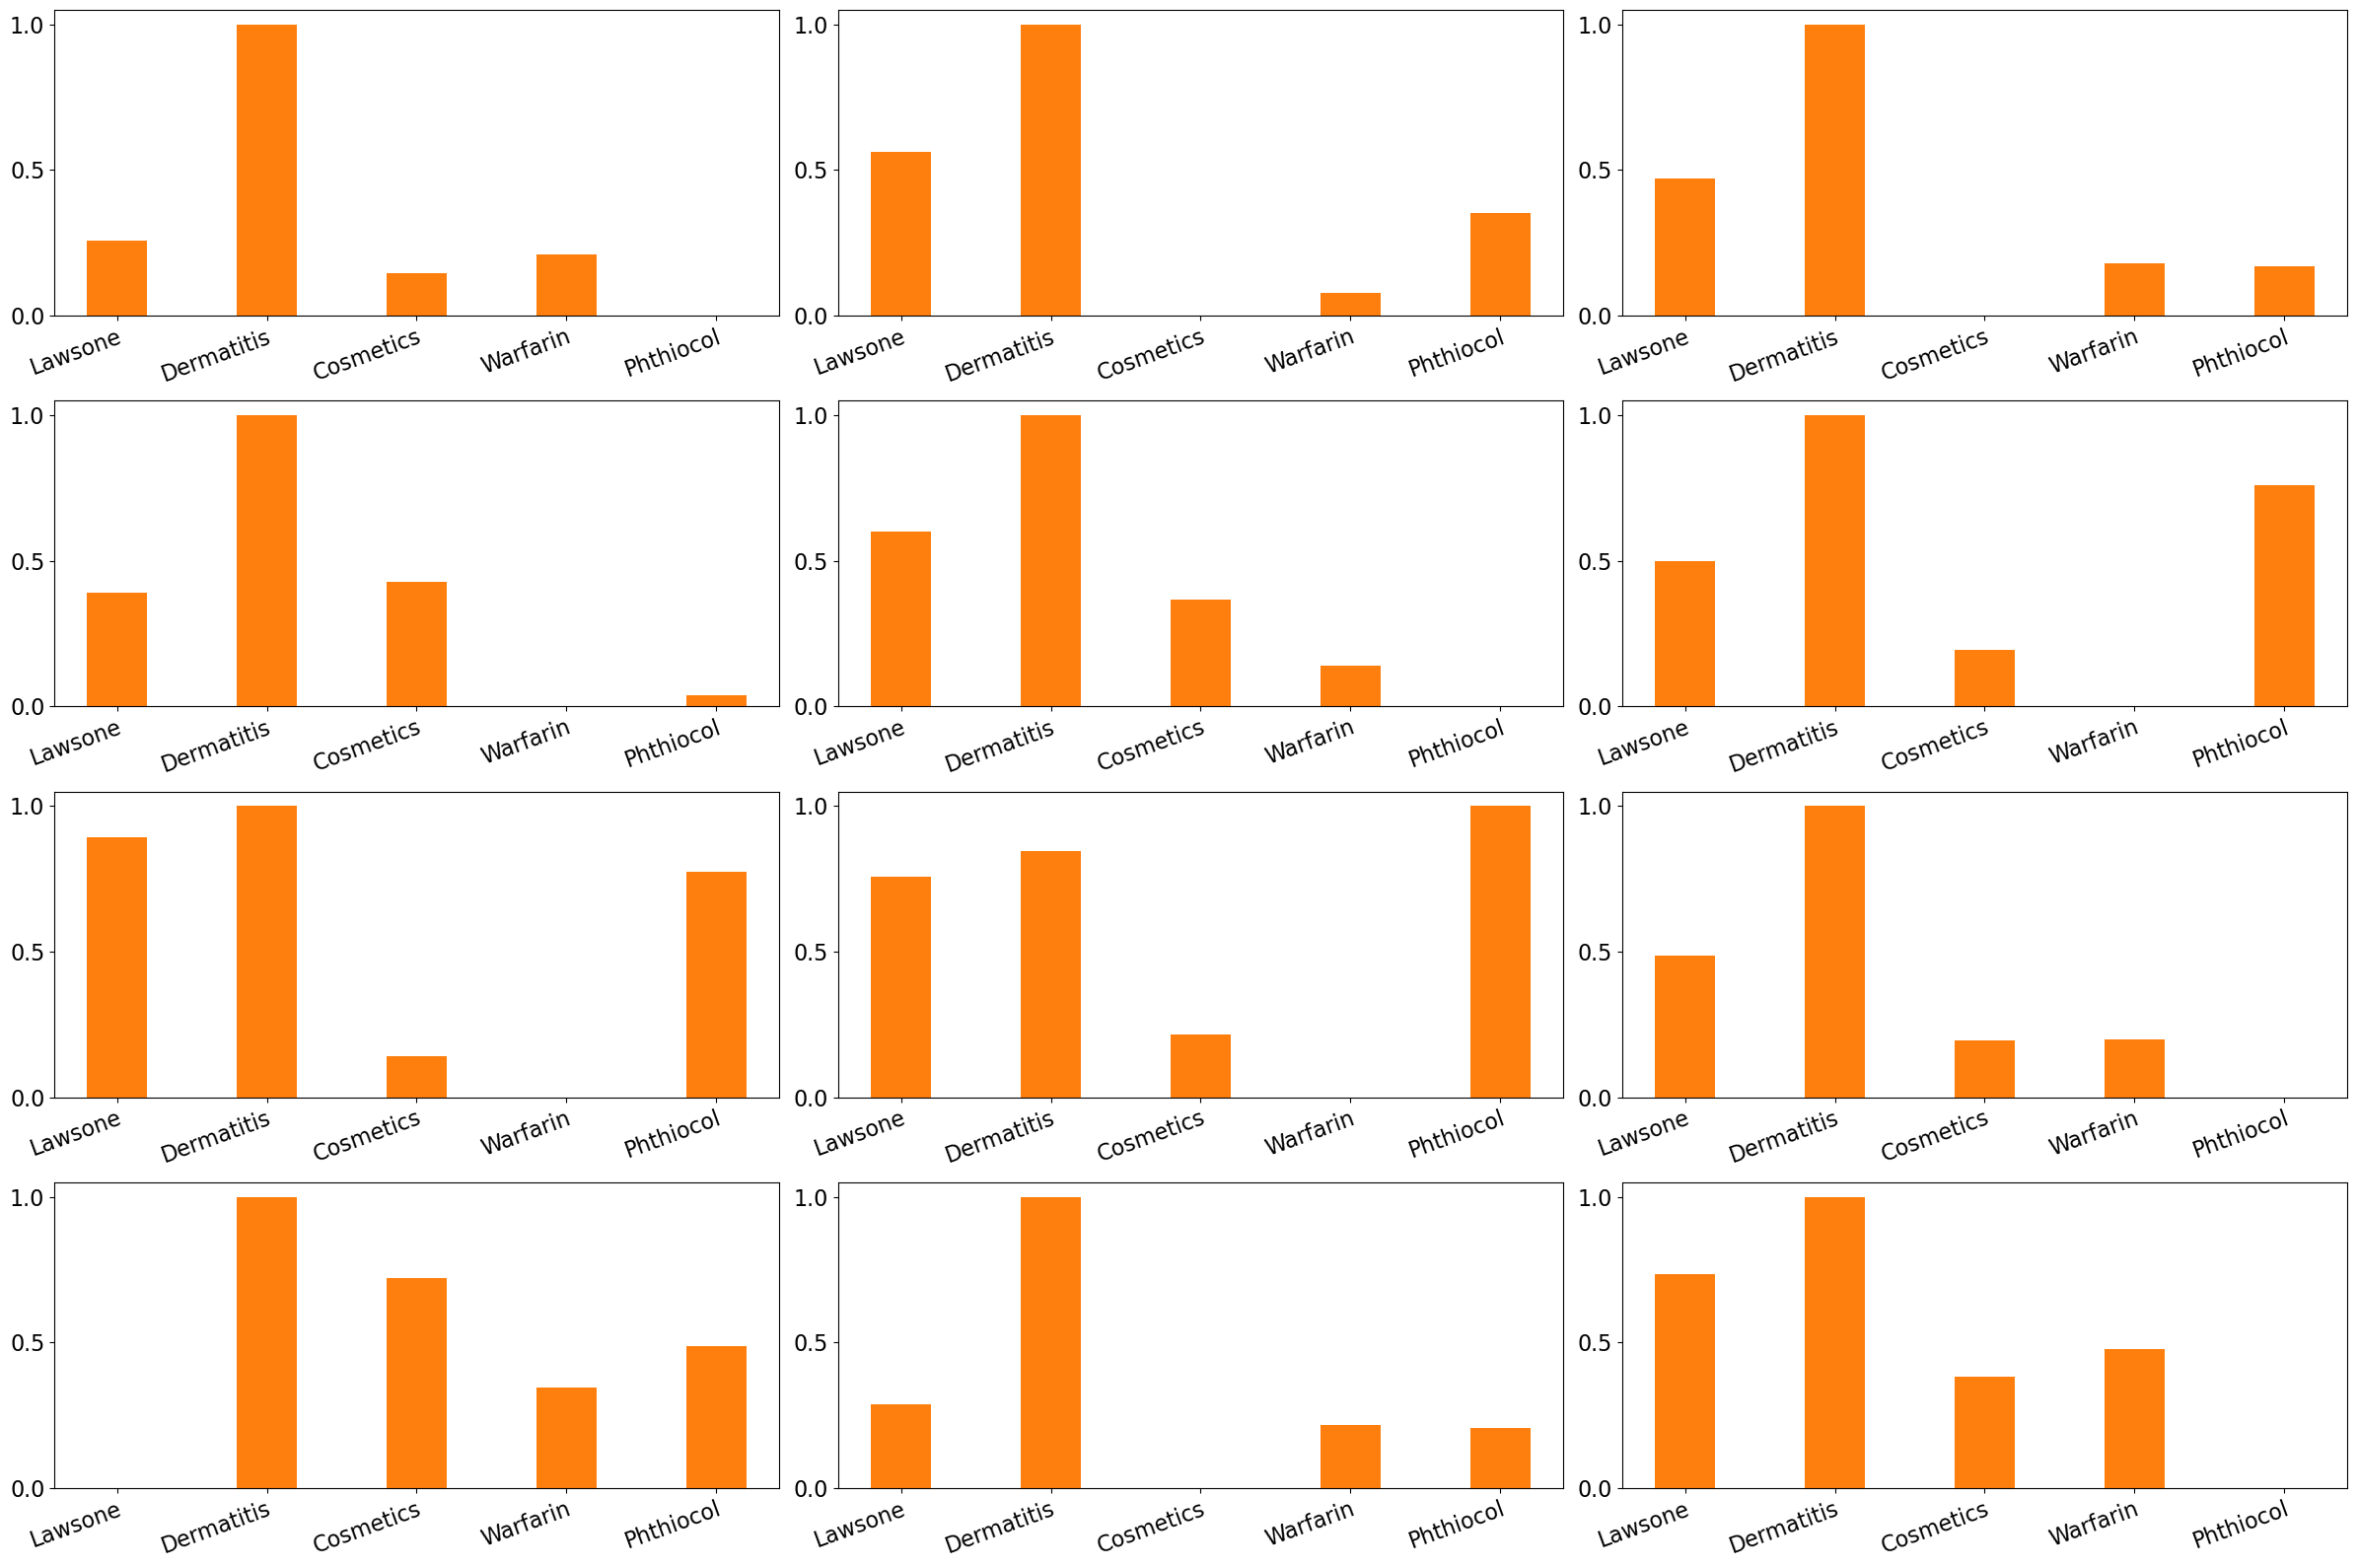

In [26]:
import pickle
import matplotlib.pyplot as plt
from rdkit import Chem

import os
import sys
sys.path.append("/root/Open_DAIR_BioMed/open_biomed/")

import numpy as np
import torch
from torch_geometric.data import Batch

from models.drug_encoder.molalbef import MolALBEF
from feat.drug_featurizer import DrugGraphFeaturizer
from feat.text_featurizer import TextTransformerTokFeaturizer

def load_kg(path):
    data = pickle.load(open(path, "rb"))
    adj = {}
    for triplet in data["triplets"]:
        if triplet[0] not in adj:
            adj[triplet[0]] = [triplet]
        else:
            adj[triplet[0]].append(triplet)
        if triplet[2] not in adj:
            adj[triplet[2]] = [triplet]
        else:
            adj[triplet[2]].append(triplet)
    return adj, data

adj, data = load_kg("/share/project/molpretrain/data/kg/kg.pkl")
id2ent = {}
for ent in data["ent_dict"]:
    id2ent[data["ent_dict"][ent]] = ent
id2smiles = {}
with open("../../datasets/mtr/momu_pretrain/pair.txt", "r") as f:
    for line in f.readlines():
        line = line.rstrip("\n").split("\t")
        idx, smi = line[0], line[1]
        id2smiles[idx] = smi


for k in adj:
    if len(adj[k]) > 10 and id2ent[k] in id2smiles:
        flag = False
        flag1 = False
        for e in adj[k]:
            if e[1] != 0 and e[1] != 15:
                flag = True
            if e[1] == 0:
                flag1 = True
        if flag and flag1:
            print(k, id2smiles[id2ent[k]])
print(id2smiles['10221'], id2smiles['16871'], id2smiles['8530'])

a = []
for e in adj[22502]:
    if e[0] == 22502:
        print(e[1], e[2], id2ent[e[2]])
        a.append(e[2])
"""
print("--------------------------------")
for e in adj[25904]:
    if e[0] == 25904:
        print(e[1], e[2], id2ent[e[2]])
        a.append(e[2])

"""
#text = "the molecule is similar to Remetinostat"
#text = "the molecule is used to treat pancreatitis"
text = "it increases therapeutic efficacy of warfarin"
#text = "The molecule decreases activities of Mestranol"
text_input = TextTransformerTokFeaturizer({
    "name": "TransformerTokenizer",
    "transformer_type": "bert",
    "max_length": 128,
    "model_name_or_path": "/root/Open_DAIR_BioMed/ckpts/text_ckpts/scibert_scivocab_uncased"
})(text)
for key in text_input:
    text_input[key] = torch.tensor([text_input[key]])
print(text_input)

smi = "C1=CC=C2C(=C1)C(=CC(=O)C2=O)O"
mol = Chem.MolFromSmiles(smi)
mol = DrugGraphFeaturizer({
    "name": "BaseGNN"
})(smi)
mol = Batch.from_data_list([mol])

kg = {
    "neigh_indice": torch.tensor([[22502, 615, 729, 24798, 25904]]),
    "neigh_attn": torch.tensor([[1, 1, 1, 1, 1]])
}

model = MolALBEF({
    "gin_hidden_dim": 300,
    "gin_num_layers": 5,
    "drop_ratio": 0.0,
    "bert_config_path": "/root/Open_DAIR_BioMed/open_biomed/configs/mtr/kvplm_bert_config.json",
    "max_n_nodes": 128,
    "projection_dim": 256,
    "kge": {
        "n_ents": 49111,
        "n_rels": 16,
        "norm": 1,
        "hidden_size": 256,
        "margin": 1.0
    }
})
state_dict = torch.load("/root/Open_DAIR_BioMed/ckpts/fusion_ckpts/molalbef-ke-2/checkpoint_299.pth")["model"]
model.load_state_dict(state_dict)
with torch.no_grad():
    result = model(mol, text_input, kg, False, True)
attn = result["cross_attentions"][-1].squeeze(0)
print(attn.shape)
attn = attn[:, 0, -5:]
print(attn.shape)
fig = plt.figure(figsize=(24, 16))
for i in range(12):
    cur_attn = attn[i] - attn[0]
    mn, mx = cur_attn.min(), cur_attn.max()
    cur_attn = (cur_attn - mn) / (mx - mn)
    plt.subplot2grid((4, 3),(i // 3, i % 3))
    plt.bar(np.arange(5), cur_attn.numpy(), width=0.4, color='tab:orange')
    plt.xticks(np.arange(5), ('Lawsone', 'Dermatitis', 'Cosmetics', 'Warfarin', 'Phthiocol'), fontsize=16, rotation=20, ha='right', rotation_mode='anchor')
    plt.yticks(np.array([0, 0.5, 1]), fontsize=16)
fig.tight_layout()
plt.show()

tensor([0.0709, 0.1439, 0.9609, 0.0719, 0.0706, 0.0831, 0.0686, 0.0716, 0.0690,
        0.0730, 0.1783, 0.0729, 0.0906, 0.0728, 0.0743, 0.0926, 3.4656])


[07:31:32] WARNING: not removing hydrogen atom without neighbors
[07:31:32] WARNING: not removing hydrogen atom without neighbors
[07:31:32] WARNING: not removing hydrogen atom without neighbors
[07:31:33] WARNING: not removing hydrogen atom without neighbors
[07:31:33] WARNING: not removing hydrogen atom without neighbors
[07:31:33] WARNING: not removing hydrogen atom without neighbors
[07:31:33] WARNING: not removing hydrogen atom without neighbors


15613
49111
{'DRUG-DISEASE': 0, 'increased activities': 1, 'increase risk/severity of adverse effect': 2, 'increase of therapeutic efficacy': 3, 'decreased activities': 4, 'decrease of therapeutic efficacy': 5, 'increased metabolism': 6, 'decreased serum concentration': 7, 'increased serum concentration': 8, 'DRUG-DRUG': 9, 'decreased excretion rate, higher serum level': 10, 'increased excretion rate, lower serum level': 11, 'decreased metabolism': 12, 'decrease risk/severity of adverse effect': 13, 'DRUG-TARGET': 14, 'SIMILAR_TO': 15}


[07:31:37] WARNING: not removing hydrogen atom without neighbors
[07:31:37] WARNING: not removing hydrogen atom without neighbors
[07:31:37] WARNING: not removing hydrogen atom without neighbors
[07:31:37] WARNING: not removing hydrogen atom without neighbors
[07:31:37] WARNING: not removing hydrogen atom without neighbors
[07:31:38] WARNING: not removing hydrogen atom without neighbors
[07:31:38] WARNING: not removing hydrogen atom without neighbors


CC(=O)NC1C(C(C(OC1OP(=O)(O)OP(=O)(O)OCC2C(C(C(O2)N3C=CC(=O)NC3=O)O)O)CO)O)O CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1OP(=O)(O)OP(=O)(O)OC[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=CC(=O)NC3=O)O)O)CO)O)O [-13.838586 -12.986129] [-13.838629 -13.04043 ] 0.05430128
CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1OP(=O)(O)OP(=O)(O)OC[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=CC(=O)NC3=O)O)O)CO)O)O CC(=O)NC1C(C(C(OC1OP(=O)(O)OP(=O)(O)OCC2C(C(C(O2)N3C=CC(=O)NC3=O)O)O)CO)O)O [-13.838629 -13.04043 ] [-13.838586 -12.986129] 0.05430128
CC(=O)NC1C(C(C(OC1OP(=O)(O)OP(=O)(O)OCC2C(C(C(O2)N3C=CC(=O)NC3=O)O)O)CO)O)O CC(=O)N[C@@H]1[C@H]([C@H]([C@H](O[C@@H]1OP(=O)(O)OP(=O)(O)OC[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=CC(=O)NC3=O)O)O)CO)O)O [-13.838586 -12.986129] [-13.795956 -13.13577 ] 0.1555949
CC(=O)N[C@@H]1[C@H]([C@H]([C@H](O[C@@H]1OP(=O)(O)OP(=O)(O)OC[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=CC(=O)NC3=O)O)O)CO)O)O CC(=O)NC1C(C(C(OC1OP(=O)(O)OP(=O)(O)OCC2C(C(C(O2)N3C=CC(=O)NC3=O)O)O)CO)O)O [-13.795956 -13.13577 ] [-13.838586 -12.986129] 0.155594

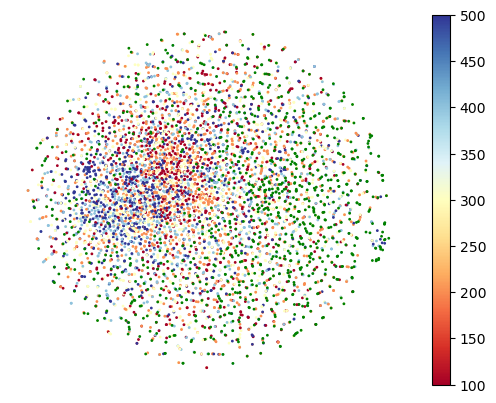

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch
import matplotlib as mpl
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Descriptors import ExactMolWt
from sklearn.manifold import TSNE
import random

#plt.figure(figsize=(15,15))

random.seed(42)
np.random.seed(42)
transe_params = torch.load("../../ckpts/kge/epoch699.pth", map_location="cpu")
kge_all = transe_params['ent_emb.weight'].numpy()
print(transe_params['rel_emb.weight'].norm(p=2, dim=1))

id2smiles = {}
with open("../../datasets/mtr/momu_pretrain/pair.txt", "r") as f:
    for line in f.readlines():
        line = line.rstrip("\n").split("\t")
        idx, smi = line[0], line[1]
        mol = Chem.MolFromSmiles(smi)
        if mol is not None:
            id2smiles[idx] = smi
print(len(id2smiles))

kg = pickle.load(open("/share/project/molpretrain/data/kg/kg.pkl", "rb"))
ents = kg["ent_dict"]
print(len(ents))
print(kg["rel_dict"])
mol_weights = np.zeros(len(ents))
cnt = 0
selected, unselected = [], []
for k in ents:
    if k in id2smiles:
        mol = Chem.MolFromSmiles(id2smiles[k])
        mol_weights[ents[k]] = ExactMolWt(mol)
        #mol_weights[ents[k]] = 0.8
        selected.append(ents[k])
    elif not k.startswith("DRUGBANK"):
        unselected.append(ents[k])
    else:
        x = random.randint(0, 10)
        if x >= 5:
            unselected.append(ents[k])

#print(selected, unselected)
selected = selected[:5000]
unselected = np.array(unselected)
perm = np.random.permutation(len(unselected))
idxs = selected + list(unselected[perm[:len(selected) // 5]])
#idxs = selected
#print(idxs)
kge = kge_all[idxs]
tsne = TSNE(n_components=2, random_state=42)
kge = tsne.fit_transform(kge)

cnt = 0
N = 0
sim_dist = 0
unsim_dist = 0
with open("/share/project/molpretrain/data/kg/sim_kg.txt") as f:
    for line in f.readlines():
        line = line.rstrip("\n").split("\t")
        h = ents[line[0]]
        t = ents[line[2]]
        cur = 0
        curn = 0
        for i in range(N % 20, len(ents) - N % 20, len(ents) // 20):
            cur += np.linalg.norm(kge_all[h] - kge_all[i], ord=2)
            curn += 1
        sim_dist += np.linalg.norm(kge_all[h] - kge_all[t], ord=2)
        unsim_dist += cur / curn
        N += 1
        if h in selected and t in selected and cnt <= 10 and np.linalg.norm(kge[selected.index(h)] - kge[selected.index(t)]) < 0.5 and np.linalg.norm(kge[selected.index(h)] - kge[selected.index(t)]) > 0:
            print(id2smiles[line[0]], id2smiles[line[2]], kge[selected.index(h)], kge[selected.index(t)], np.linalg.norm(kge[selected.index(h)] - kge[selected.index(t)]))
print(sim_dist / N, unsim_dist / N)

indexes = [[], [], [], [], [], []]
for i in idxs:
    if mol_weights[i] == 0:
        indexes[0].append(i)
    elif mol_weights[i] <= 120:
        indexes[1].append(i)
        mol_weights[i] = 100
    elif mol_weights[i] <= 180:
        indexes[2].append(i)
        mol_weights[i] = 200
    elif mol_weights[i] <= 260:
        indexes[3].append(i)
        mol_weights[i] = 300
    elif mol_weights[i] <= 360:
        indexes[4].append(i)
        mol_weights[i] = 400
    else:
        indexes[5].append(i)
        mol_weights[i] = 500
print([len(x) for x in indexes])

for i in range(len(idxs)):
    if kge[i][0] >= 43 and kge[i][1] >= -20 and kge[i][1] <= -10:
        x = random.randint(0, 5)
        if x < 4:
            kge[i][0] = 15 + random.randint(0, 100) / 10
            kge[i][1] = -5 + random.randint(0, 100) / 10
print(mol_weights[idxs])
sc = plt.scatter(kge[:len(selected), 0], kge[:len(selected), 1], s=1, c=mol_weights[selected], cmap=mpl.colormaps['RdYlBu'])
plt.scatter(kge[len(selected):, 0], kge[len(selected):, 1], s=1, c=[(0, 0.5, 0)] * (len(selected) // 5))
#plt.scatter([15.286115, 15.279163, -21.629204, -21.505081, -27.348085, -27.461945, 9.122984, 9.206772], [5.303254, 5.3019924, -14.348616, -14.488132, 7.2253103, 7.335349, -17.803703, -18.060122], s=10, c=[(0, 0, 0)] * 8)
plt.colorbar(sc)
plt.axis('off')
plt.show()


In [15]:
import numpy as np
import pickle

def load_kg(path):
    data = pickle.load(open(path, "rb"))
    adj = {}
    for triplet in data["triplets"]:
        if triplet[0] not in adj:
            adj[triplet[0]] = [triplet]
        else:
            adj[triplet[0]].append(triplet)
        if triplet[2] not in adj:
            adj[triplet[2]] = [triplet]
        else:
            adj[triplet[2]].append(triplet)
    return adj, data
"""
transe_params = torch.load("../../ckpts/kge/epoch699.pth", map_location="cpu")
kge1 = transe_params['ent_emb.weight'].numpy()[idxs]
kge1 = tsne.fit_transform(kge1)
sc = plt.scatter(kge1[:len(selected), 0], kge1[:len(selected), 1], s=1, c=mol_weights[selected], cmap=mpl.colormaps['RdYlBu'])
plt.scatter(kge1[len(selected):, 0], kge1[len(selected):, 1], s=1, c=[(0, 0.5, 0)] * (len(selected) // 4))
plt.colorbar(sc)
plt.axis('off')
plt.show()
"""
adj, data = load_kg("/share/project/molpretrain/data/kg/kg.pkl")
x, y, z = 0, 0, 0
for k in data['ent_dict']:
    if k.startswith("DB"):
        x += 1
    elif k.startswith("MESH"):
        y += 1
    else:
        z += 1
print(x, y, z)
a = np.zeros(16, dtype=int)
for d in data["triplets"]:
    a[d[1]] += 1
print(data["rel_dict"], a)

14809 19665 14637
{'DRUG-DISEASE': 0, 'increased activities': 1, 'increase risk/severity of adverse effect': 2, 'increase of therapeutic efficacy': 3, 'decreased activities': 4, 'decrease of therapeutic efficacy': 5, 'increased metabolism': 6, 'decreased serum concentration': 7, 'increased serum concentration': 8, 'DRUG-DRUG': 9, 'decreased excretion rate, higher serum level': 10, 'increased excretion rate, lower serum level': 11, 'decreased metabolism': 12, 'decrease risk/severity of adverse effect': 13, 'DRUG-TARGET': 14, 'SIMILAR_TO': 15} [4.997450e+05 2.974380e+05 1.044749e+06 4.649200e+04 8.271200e+04
 2.111080e+05 1.109580e+05 2.504800e+04 7.953600e+04 4.833800e+04
 3.901200e+05 5.676800e+04 2.880100e+05 8.800000e+02 2.387000e+04
 9.580400e+04]


In [2]:
a={'mrr_d2t': 0.379684104051647, 'mrr_t2d': 0.390048352158235, 'rec@1_d2t': 0.27980206927575346, 'rec@1_t2d': 0.2919478182636077, 'rec@5_d2t': 0.4916779127305443, 'rec@5_t2d': 0.4916779127305443, 'rec@10_d2t': 0.5721997300944669, 'rec@10_t2d': 0.5748987854251012}
b={'mrr_d2t': 0.3861342140799406, 'mrr_t2d': 0.39688210821950115, 'rec@1_d2t': 0.2838506522717049, 'rec@1_t2d': 0.2964462438146649, 'rec@5_d2t': 0.50472334682861, 'rec@5_t2d': 0.5056230319388214, 'rec@10_d2t': 0.5897435897435898, 'rec@10_t2d': 0.5879442195231669}
c={'mrr_d2t': 0.3956, 'mrr_t2d': 0.3934, 'rec@1_d2t': 0.2976, 'rec@1_t2d': 0.2939, 'rec@5_d2t': 0.5053, 'rec@5_t2d': 0.5026, 'rec@10_d2t': 0.5863, 'rec@10_t2d': 0.5849}
for key in a:
    print(key, c[key] - b[key] + a[key])

mrr_d2t 0.3891498899717064
mrr_t2d 0.3865662439387339
rec@1_d2t 0.2935514170040485
rec@1_t2d 0.2894015744489428
rec@5_d2t 0.4922545659019343
rec@5_t2d 0.4886548807917229
rec@10_d2t 0.5687561403508772
rec@10_t2d 0.5718545659019343
